# Семинар 2: линейная регрессия, обучение и валидация модели.


### 1. Вывод аналитической формулы весов 

Решите аналитически задачу минимизации функции потерь $Q(w)=(Xw-y)^T(Xw-y)$ в задаче линейной регрессии.

### 2. Одномерная линейная регрессия

1. Выведите формулу обновления весов одномерной линейной регрессии методом градиентного спуска.

2. Напишите функцию, релизующую обучение одномерной линейной регрессии методом градиентного спуска.

In [ ]:
def linear_regression(X, y_true, m=0, b=0, epochs=1000, learning_rate=0.0001):
    N = float(len(y_true))
    for i in range(epochs):
        y_pred = m * X + b
        cost = #your code here
        
        m_gradient = #your code here
        b_gradient = #your code here
        
        m = #your code here
        b = #your code here
            
    return m, b, cost

## Сгенерируем точки для задачи регрессии

Populating the interactive namespace from numpy and matplotlib


C:\Users\elena\AppData\Roaming\Python\Python37\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


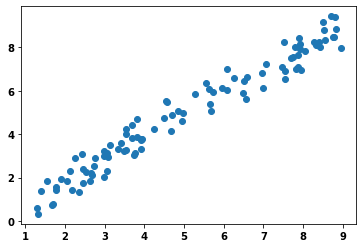

In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
%pylab inline

num_points = 100
m, b, delta = 1, 0, 1

x = np.linspace(1, 10, num_points)
y = m * x + b + random.uniform(-delta, delta, num_points)

plt.scatter(x,y)

### Обучим нашу линейную регрессию и посмотрим на результат

In [ ]:
m, b, cost = linear_regression(x,y)

y_pred = m * x + b

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, 'r-')

print('MSE: {}'.format(cost))

# Задание 1

Поэкспериментируйте с количеством шагов (epochs) и learning rate.
Как меняется итоговая ошибка при фиксированном числе шагов и различных learning rate?

1) Постройте графики для learning rate = 0.1, 0.01, 0.0001 и epochs = 10, 100, 1000 (всего 9 графиков).
Рядом с каждым графиком выведите ошибку (cost).

2) Прокомментируйте каждый график: ответьте на вопрос, почему вы видите именно такую прямую?

In [ ]:
#your code here

# Задание 2

Подумайте, как применить написанную функцию линейной регрессии для аппроксимации следующего набора точек. Решите эту задачу. Выведите на экран итоговое приближение (график) и ошибку.

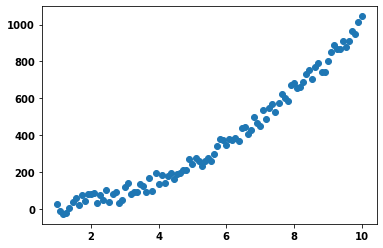

In [3]:
num_points = 100
m, b, delta = 10, 0, 50

x = np.linspace(1, 10, num_points)
y = m * x**2 + b + random.uniform(-delta, delta, num_points)

plt.scatter(x,y)

In [ ]:
#your code here

# Задание 3

Считайте файл weights_heights.csv

In [ ]:
df = #your code here
df.head()

### Обучение и валидация модели.

Разобъем данные на тренировочную и валидационную часть и обучим линейную регрессию на тренировочной части (используйте функцию linear_regression для обучения)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Height'], df['Weight'], test_size=0.2)

m, b, cost = linear_regression(X_train, y_train, learning_rate=0.00001)

Сделаем предсказание на тренировочной и тестовой части по формуле y=mx+b.

Вычислим MSE на train и на test.

In [ ]:
from sklearn.metrics import mean_squared_error

pred_train = m * X_train + b
pred_test = m * X_test + b

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))

# Теперь проверим, как работает функция линейной регрессии из sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

X_train2 = X_train.values.reshape(-1,1)
X_test2 = X_test.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X_train2,y_train)

pred_train = lr.predict(X_train2)
pred_test = lr.predict(X_test2)

print("Train MSE: {}".format(mean_squared_error(y_train, pred_train)))
print("Test MSE: {}".format(mean_squared_error(y_test, pred_test)))

Посмотрим на качество линейной регрессии на кросс-валидации.

In [ ]:
from sklearn.model_selection import cross_val_score

print(-cross_val_score(lr, df[['Height']], df['Weight'], cv=5, scoring='neg_mean_squared_error').mean())

# Задание 4

Поработаем с датасетом Бостон.

In [ ]:
from sklearn.datasets import load_boston

data = load_boston()
print(data.DESCR)

In [ ]:
X_full = data.data
y_full = data.target

y_full[:5]

Посмотрите на качество линейной регрессии (из sklearn) на кросс-валидации с тремя фолдами, измеряйте ошибку MSE.

In [ ]:
#your code here

Разбейте данные на train и test. Обучите линейную регрессию на train и сделайте предсказание на train и test.

Выведите MSE на train и на test.

In [ ]:
#your code here

Нарисуем матрицу корреляций признаков.

In [ ]:
import seaborn as sns

data1 = pd.DataFrame(data= np.c_[data['data'], data['target']],
                     columns= list(data['feature_names']) + ['target'])

plt.figure(figsize=(10,10))
corr = data1.corr()
sns.heatmap(corr,annot=True,linewidths=.5, fmt= '.2f',mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True)

Попробуйте убрать из данных признаки с наименьшей корреляцией с target (1, 2 или 3 признака) и обучить линейную регрессию на оставшихся признаках. Как изменилось качество?

In [ ]:
#your code here